In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:0'
########## initulize reference data and target data
from alignment.data_preprocess import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from alignment.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from representationTrans.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 491.80it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8155.75it/s]


absolute alignment indicates number: 106 label diff indicates number: 12 confidence diff indicates number: 16 high distance number: 97


In [2]:

####### generate boundary ponits for tar and ref respectively
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,REF_PATH, CLEAN_PATH,CLEAN_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_boundary,tar_boundary = BoundaryGen.get_boundary_point(DEVICE,num_adv_eg=5000)
import torch
###### get border sample features
import torch.nn as nn

ref_feature_model = ref_model.to(DEVICE)
ref_feature_model = nn.Sequential(*list(ref_feature_model.children())[:-1])
with torch.no_grad():
    features = ref_feature_model(ref_boundary)
    ref_features = features.view(ref_boundary.shape[0], -1).cpu().numpy()

###### get border sample features
tar_feature_model = tar_model.to(DEVICE)
tar_feature_model = nn.Sequential(*list(tar_feature_model.children())[:-1])
with torch.no_grad():
    tar_features = tar_feature_model(tar_boundary)
    tar_features = tar_features.view(tar_boundary.shape[0], -1).cpu().numpy()

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8805.05it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:01<00:00, 132.23it/s]


conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (5000, 10) (4997, 10) (5000, 10) (4997, 10)
conf1 (4997, 10) (5000, 10) (4997, 10) (5000, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (4994, 10) (5000, 10) (4994, 10)
conf1 (4994, 10) (4999, 10) (4994, 10) (4999, 10)
conf1 (5000, 10) (4997, 10) (5000, 10) (4997, 10)
conf1 (5000, 10) (5000, 10) (5000, 10) (5000, 10)
conf1 (4994, 10) (4999, 10) (4994, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (5000, 10) (4999, 10) (5000, 10) (4999, 10)
conf1 (4994, 10) (4997, 10) (4994, 10) (4997, 10)
conf1 (4997, 10) (4999, 10) (4997, 10) (4999, 10)
conf1 (4999, 10) (5000, 10) (4999, 10) (5000, 10)
conf1 (4999, 10) (4999, 10) (4999, 10) (4999, 10)
conf1 (5000, 10) (4994, 10) (5000, 10) (4994, 10)
conf1 (4999, 10) (4999, 10) (4999, 10) (4999, 10)


Computing decision regions ...


100%|██████████| 25/25 [00:00<00:00, 12360.91it/s]


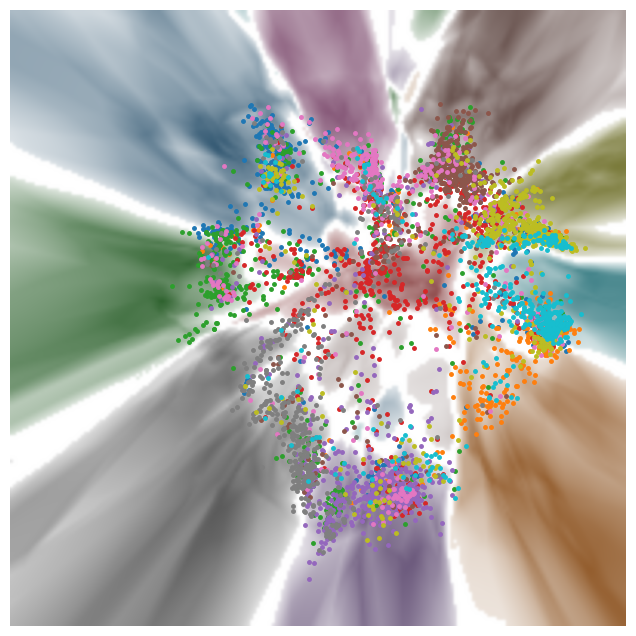

In [7]:
####### target gen boundary
import os

# from representationTrans.visualizer import visualizer
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
# save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)
from AlignVisAutoEncoder.visualizer_boundary import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, tar_features, projector, 200,[],'tab10')
# from representationTrans.visualizer import visualizer
# vis = visualizer(tar_provider, I,I, np.dot(tar_provider.test_representation(200), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 25/25 [00:00<00:00, 13178.03it/s]


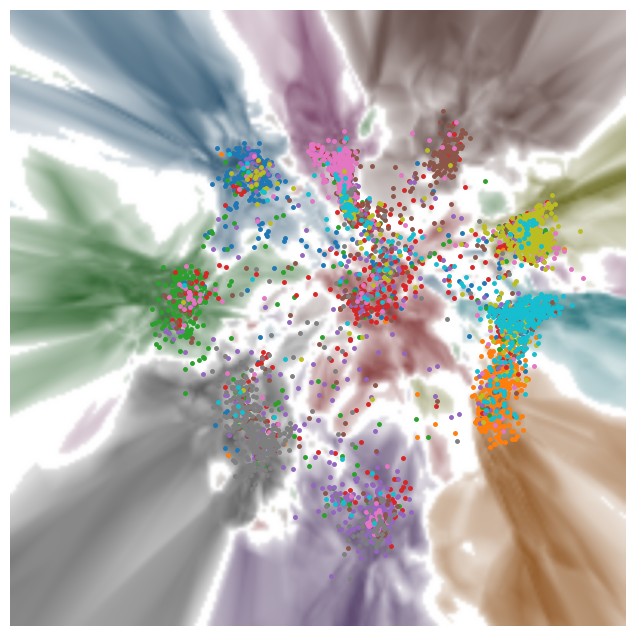

In [9]:
import os
VIS_MODEL_NAME = 'vis2'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
from AlignVisAutoEncoder.visualizer_boundary import visualizer
vis = visualizer(ref_provider, ref_features, projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

In [3]:
######### initialize autoencoder and dataloader #########################
from AlignVisAutoEncoder.autoencoder import SimpleAutoencoder
from AlignVisAutoEncoder.data_loader import DataLoaderInit


input_dim = 512
output_dim = 512
batch_size = 200

autoencoder = SimpleAutoencoder(input_dim,output_dim)


######### train sample + generated boundary sample's => input  #############
input_X = np.concatenate((ref_provider.train_representation(REF_EPOCH), ref_features),axis=0)
input_Y = np.concatenate((tar_provider.train_representation(TAR_EPOCH), tar_features),axis=0)
data_loader_b = DataLoaderInit(input_X, input_Y,batch_size)
data_loader = DataLoaderInit(ref_provider.train_representation(REF_EPOCH), tar_provider.train_representation(TAR_EPOCH),batch_size)
dataloader = data_loader.get_data_loader()
dataloader_b = data_loader_b.get_data_loader()


In [20]:
import torch.optim as optim
import numpy as np
from pyemd import emd
import torch.nn as nn
from scipy.spatial.distance import cdist
from sklearn.neighbors import kneighbors_graph
import torch.nn.functional as F
from AlignVis.losses import KNNOverlapLoss, CKALoss, PredictionLoss, ConfidenceLoss


def earth_movers_distance(X, Y, k=5):
    X, Y = X.detach().numpy(), Y.detach().numpy()
    
    # Compute KNN graphs
    X_knn_graph = kneighbors_graph(X, k, mode='distance')
    Y_knn_graph = kneighbors_graph(Y, k, mode='distance')
    
    # Convert to dense NumPy arrays
    X_knn_matrix = X_knn_graph.toarray()
    Y_knn_matrix = Y_knn_graph.toarray()

    # Calculate the EMD between the KNN distance matrices
    distance_matrix = cdist(X_knn_matrix, Y_knn_matrix)
    first_histogram = np.ones(X_knn_matrix.shape[0]) / X_knn_matrix.shape[0]
    second_histogram = np.ones(Y_knn_matrix.shape[0]) / Y_knn_matrix.shape[0]

    return emd(first_histogram, second_histogram, distance_matrix)

def frobenius_norm_loss(predicted, target):
    return torch.norm(predicted - target, p='fro') / predicted.numel()

def prediction_loss(trans_X, Y):
    
    target_output = tar_provider.get_pred(TAR_EPOCH, Y.detach().numpy())
    # tar_output = self.get_pred(self.TAR_EPOCH, adjusted_input, self.tar_provider.content_path, self.tar_model)
    ref_output = tar_provider.get_pred(TAR_EPOCH, trans_X.detach().numpy())

    loss_ref_output = F.mse_loss(torch.tensor(ref_output), torch.tensor(target_output))
    loss_Rep = F.mse_loss(trans_X, Y)
        
    # loss = loss_tar_output + loss_Rep + self.alpha_for_pred_ref * loss_ref_output
    loss =  loss_Rep + 1 * loss_ref_output
    return loss

# Define hyperparameters
num_epochs = 10
batch_size = 50
learning_rate = 1e-4

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate,weight_decay=1e-5)

alpha = 1 # weight for topological loss, adjust this according to your requirements


# Training loop
for epoch in range(num_epochs):
    # Initialize a list to store the predictions of unlabelled data
    unlabelled_preds = []
    for data_X, data_Y in dataloader_b: # Assuming you have a DataLoader instance with paired data (X, Y)
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass (encoding Y and decoding to X's space)
        transformed_Y = autoencoder.encoder(data_Y)
        recon_X = autoencoder.decoder(transformed_Y)

        topological_loss_encoder = earth_movers_distance(data_Y, transformed_Y)
        topological_loss_decoder = earth_movers_distance(data_Y, recon_X)
        
        loss_f_decoder = frobenius_norm_loss(recon_X, data_X) + 10 * topological_loss_decoder
        loss_f_encoder = frobenius_norm_loss(transformed_Y, data_X) + topological_loss_encoder

        pred_loss = prediction_loss(recon_X, data_Y)

        #### CKA loss
        cka_loss_f = CKALoss(gamma=None, alpha=1e-8)
        cka_loss = cka_loss_f(data_Y,transformed_Y,recon_X)

        loss = loss_f_decoder + loss_f_encoder + 0.01 * pred_loss + cka_loss

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()


    # Print the loss for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Loss decoder: {loss_f_decoder.item():.4f},Loss encoder: {loss_f_encoder.item():.4f},pred_loss,{pred_loss.item():.4f},CKA,{cka_loss.item():.4f}')

torch.save({
    'epoch': TAR_EPOCH,
    'model_state_dict': autoencoder.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss
}, "/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVisAutoEncoder/checkpoints/cak_1e-8.pth")


100%|██████████| 1/1 [00:00<00:00, 4152.78it/s]


Epoch [1/10], Loss: 0.1027, Loss decoder: 0.0067,Loss encoder: 0.0050,pred_loss,9.0652,CKA,0.0003


100%|██████████| 1/1 [00:00<00:00, 2621.44it/s]


Epoch [2/10], Loss: 0.0869, Loss decoder: 0.0062,Loss encoder: 0.0049,pred_loss,7.5430,CKA,0.0004


100%|██████████| 1/1 [00:00<00:00, 2718.28it/s]


Epoch [3/10], Loss: 0.0862, Loss decoder: 0.0060,Loss encoder: 0.0048,pred_loss,7.5060,CKA,0.0003


100%|██████████| 1/1 [00:00<00:00, 3398.95it/s]


Epoch [4/10], Loss: 0.0985, Loss decoder: 0.0065,Loss encoder: 0.0049,pred_loss,8.6907,CKA,0.0003


100%|██████████| 1/1 [00:00<00:00, 4048.56it/s]


Epoch [5/10], Loss: 0.0885, Loss decoder: 0.0062,Loss encoder: 0.0047,pred_loss,7.7399,CKA,0.0003


100%|██████████| 1/1 [00:00<00:00, 2375.03it/s]


Epoch [6/10], Loss: 0.1045, Loss decoder: 0.0066,Loss encoder: 0.0048,pred_loss,9.2814,CKA,0.0003


100%|██████████| 1/1 [00:00<00:00, 2690.38it/s]


Epoch [7/10], Loss: 0.0904, Loss decoder: 0.0061,Loss encoder: 0.0045,pred_loss,7.9411,CKA,0.0003


100%|██████████| 1/1 [00:00<00:00, 2798.07it/s]


Epoch [8/10], Loss: 0.0925, Loss decoder: 0.0062,Loss encoder: 0.0049,pred_loss,8.0987,CKA,0.0003


100%|██████████| 1/1 [00:00<00:00, 4911.36it/s]


Epoch [9/10], Loss: 0.1113, Loss decoder: 0.0069,Loss encoder: 0.0050,pred_loss,9.9228,CKA,0.0003


100%|██████████| 1/1 [00:00<00:00, 3990.77it/s]


Epoch [10/10], Loss: 0.0896, Loss decoder: 0.0062,Loss encoder: 0.0048,pred_loss,7.8169,CKA,0.0004


In [5]:

X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(REF_EPOCH))
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n_2 = alignment_n.align_embeddings_batch(Y,X,train_steps=2000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-3,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 65502392.0 loss2 {tensor(0.7834, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8510, requires_grad=True)}
batch_idx 199,iteration 199, loss1 592.7222900390625 loss2 {tensor(0.5366, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4920, requires_grad=True)}
batch_idx 398,iteration 398, loss1 236.24374389648438 loss2 {tensor(0.3439, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4660, requires_grad=True)}
batch_idx 97,iteration 597, loss1 216.66461181640625 loss2 {tensor(0.3112, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4190, requires_grad=True)}
batch_idx 296,iteration 796, loss1 228.19483947753906 loss2 {tensor(0.3359, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4140, requires_grad=True)}
batch_idx 495,iteration 995, loss1 205.9328155517578 loss2 {tensor(0.2813, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3770, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 191.8606414794922 loss2 {tensor(0.2756, grad_fn=<AddBackward0>)} neibour_

In [21]:
###### use auto encoder to visualize the prediction
X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
# Transform X into Y's space
encoded_X = autoencoder.decoder(X)

# Transform Y into X's space
encoded_Y = autoencoder.encoder(Y)
c_y = encoded_Y.detach().numpy()

from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between  target vs target is:         ',np_cka.kernel_CKA(Y[indicates],Y[indicates]))
print('CKA between target and linear_target:     ',np_cka.kernel_CKA(Y[indicates],np.dot(Y[indicates],R_n_2.detach().numpy())))
print('CKA between target and autoencoder_target:',np_cka.kernel_CKA(Y[indicates],c_y[indicates]))
print('CKA between  ref vs autoencoder_target is:',np_cka.kernel_CKA(X[indicates],c_y[indicates]))
print('CKA between  ref vs target is:            ',np_cka.kernel_CKA(X[indicates],c_y[indicates]))

CKA between  target vs target is:          1.0
CKA between target and linear_target:      0.7743763385580068
CKA between target and autoencoder_target: 0.9997323742332934
CKA between  ref vs autoencoder_target is: 0.822905418216865
CKA between  ref vs target is:             0.822905418216865


In [25]:
low_conf = []
high_conf = []
for i in range(len(tar_scores)):
    if tar_scores[i] < 0.995:
        low_conf.append(i)
    if tar_scores[i] == 1:
        high_conf.append(i)
len(low_conf)

623

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8739.30it/s]


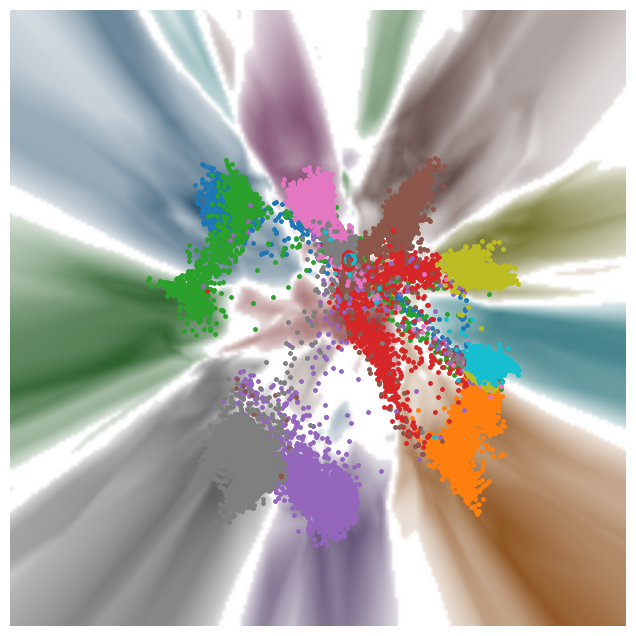

In [7]:


import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=CLEAN_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVisAutoEncoder.visualizer_inv import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider, tar_provider, autoencoder, np.dot(encoded_X.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8205.40it/s]


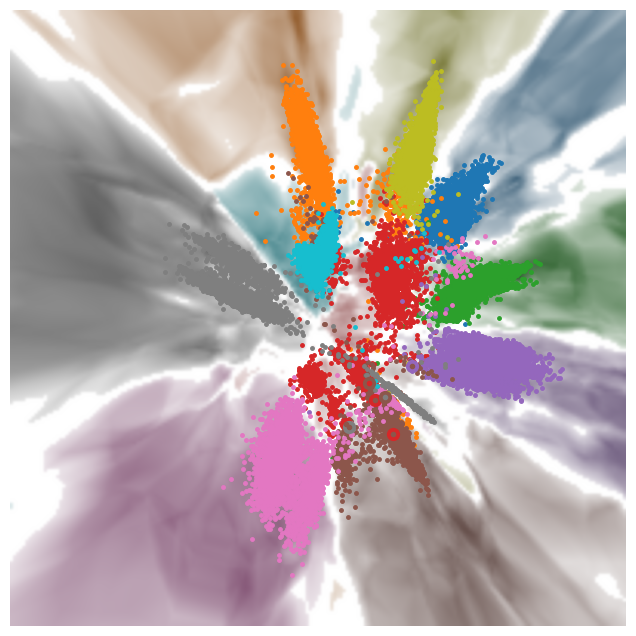

In [25]:
# checkpoint = torch.load("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVisAutoEncoder/checkpoints/cak_1v1.pth")
# autoencoder.load_state_dict(checkpoint['model_state_dict'])
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVisAutoEncoder.visualizer_ import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

In [64]:
embedding1 = projector.batch_project(200, encoded_Y.detach().numpy())
embedding2 = projector.batch_project(200, ref_provider.train_representation(200))

100%|██████████| 25/25 [00:00<00:00, 11989.21it/s]

#train# PPR: 0.09 in epoch 200


In [65]:
from AlignVisAutoEncoder.autoencoder import SimpleAutoencoder
from AlignVisAutoEncoder.data import DataLoaderInit
input_dim = 2
output_dim = 2

autoencoder_for_2d = SimpleAutoencoder(input_dim,output_dim)

In [76]:
# Training loop
data_Y = torch.Tensor(embedding1)
data_X = torch.Tensor(embedding2)
for epoch in range(num_epochs):

        # Forward pass (encoding Y and decoding to X's space)
        transformed_Y = autoencoder_for_2d.encoder(data_Y)
        recon_X = autoencoder_for_2d.decoder(transformed_Y)


        
        loss_f_decoder = frobenius_norm_loss(recon_X, data_Y) 
        loss_f_encoder = frobenius_norm_loss(transformed_Y, data_X) 



        loss = loss_f_decoder + loss_f_encoder 

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Loss decoder: {loss_f_decoder.item():.4f},Loss encoder: {loss_f_encoder.item():.4f}')


Epoch [1/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [2/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [3/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [4/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [5/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [6/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [7/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [8/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [9/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142
Epoch [10/10], Loss: 0.0257, Loss decoder: 0.0115,Loss encoder: 0.0142


Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 9148.18it/s]
../AlignVisAutoEncoder/visualizer.py:191: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
../AlignVisAutoEncoder/visualizer.py:192: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
../AlignVisAutoEncoder/visualizer.py:193: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
100%|█

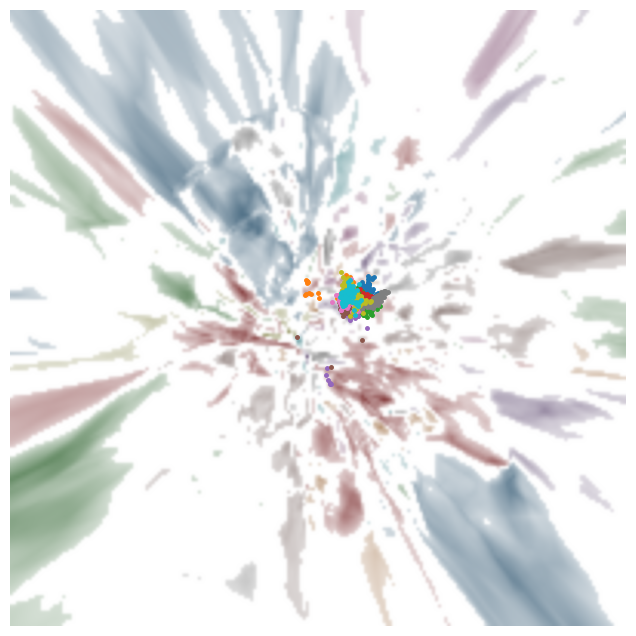

In [54]:


import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVisAutoEncoder.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[high_conf[:600]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 8737.77it/s]
../AlignVisAutoEncoder/trans_visualizer.py:189: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../AlignVisAutoEncoder/trans_visualizer.py:190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../AlignVisAutoEncoder/trans_visualizer.py:191: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` i

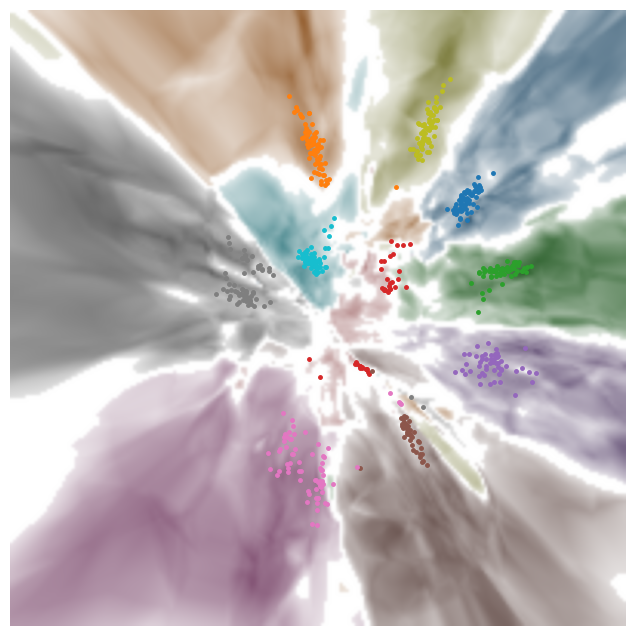

In [48]:


import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVisAutoEncoder.trans_visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[high_conf[:600]],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8337.45it/s]


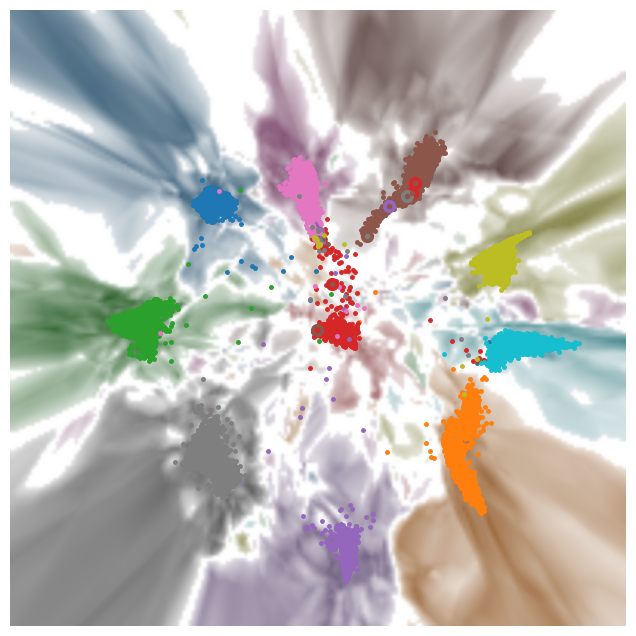

In [22]:


import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis2'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVisAutoEncoder.trans_visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

In [13]:
from AlignVis_eval.Alignmenteval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)

In [14]:
eval.eval_boundary_nn_autoencoder(tar_features, autoencoder)

#train# boundary preserving: 3.73/15 in epoch 200


3.7269

In [24]:
eval.eval_nn_train_autoencoder(15, autoencoder )

Wed Apr 19 23:53:49 2023 Building RP forest with 16 trees
Wed Apr 19 23:53:50 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Wed Apr 19 23:53:51 2023 Building RP forest with 16 trees
Wed Apr 19 23:53:51 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.34/15 in epoch 200


1.33734

In [16]:
eval.eval_nn_train_ref_in_ref(15)

Wed Apr 19 22:58:51 2023 Building RP forest with 16 trees
Wed Apr 19 22:58:51 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Wed Apr 19 22:59:03 2023 Building RP forest with 16 trees
Wed Apr 19 22:59:03 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving ref in ref: 1.22/15 in epoch 200


1.22072

In [85]:

X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(REF_EPOCH))
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n_2 = alignment_n.align_embeddings_batch(Y,X,train_steps=2000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-3,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 65367516.0 loss2 {tensor(0.6277, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8270, requires_grad=True)}
batch_idx 199,iteration 199, loss1 1126.5791015625 loss2 {tensor(0.6471, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6190, requires_grad=True)}
batch_idx 398,iteration 398, loss1 268.49554443359375 loss2 {tensor(0.4852, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5740, requires_grad=True)}
batch_idx 97,iteration 597, loss1 207.60659790039062 loss2 {tensor(0.4076, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5470, requires_grad=True)}
batch_idx 296,iteration 796, loss1 248.89566040039062 loss2 {tensor(0.4966, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5410, requires_grad=True)}
batch_idx 495,iteration 995, loss1 270.5224609375 loss2 {tensor(0.4901, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5480, requires_grad=True)}
batch_idx 194,iteration 1194, loss1 174.88636779785156 loss2 {tensor(0.3384, grad_fn=<AddBackward0>)} neibour_loss

In [12]:
eval.eval_boundary_nn_linear(tar_features,R_n_2.detach().numpy())

#train# boundary preserving for linear: 2.09/15 in epoch 200


2.09272

In [11]:
eval.eval_boundary_nn_ref_in_ref(ref_features)

#train# boundary preserving: 2.31/15 in epoch 200


2.31254

In [84]:
eval.eval_boundary_nn_tar_in_ref(tar_features)

#train# boundary preserving: 0.78/15 in epoch 100


0.78056

In [26]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Wed Apr 19 23:56:05 2023 Building RP forest with 16 trees
Wed Apr 19 23:56:06 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Wed Apr 19 23:56:07 2023 Building RP forest with 16 trees
Wed Apr 19 23:56:07 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.33/15 in epoch 200


1.3333

In [120]:
##### eval reference 

init_data = ref_provider.train_representation(REF_EPOCH)

embedding = projector.batch_project(REF_EPOCH, init_data)
ref_val = evaluate_proj_nn_perseverance_knn(init_data, embedding, n_neighbors=n_neighbors, metric="euclidean")

print("#train# nn preserving for ref in ref vis: {:.2f}/{:d} in epoch {:d}".format(ref_val, n_neighbors, REF_EPOCH))


Sun Apr  9 01:46:08 2023 Building RP forest with 16 trees
Sun Apr  9 01:46:09 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Sun Apr  9 01:46:10 2023 Building RP forest with 16 trees
Sun Apr  9 01:46:11 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for ref in ref vis: 1.22/15 in epoch 200


In [93]:
##### eval reference timevis visualize tar_representation

init_data = tar_provider.train_representation(REF_EPOCH)

embedding = projector.batch_project(REF_EPOCH, init_data)
val = evaluate_proj_nn_perseverance_knn(init_data, embedding, n_neighbors=n_neighbors, metric="euclidean")

print("#train# nn preserving for tar in ref vis: {:.2f}/{:d} in epoch {:d}".format(val, n_neighbors, REF_EPOCH))


Sun Apr  9 00:59:09 2023 Building RP forest with 16 trees
Sun Apr  9 00:59:10 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Sun Apr  9 00:59:11 2023 Building RP forest with 16 trees
Sun Apr  9 00:59:11 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for tar in ref vis: 1.07/15 in epoch 200


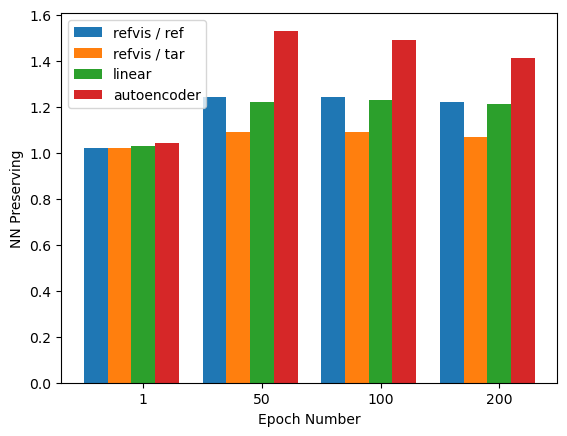

In [98]:
##### with predcition loss
import numpy as np
import matplotlib.pyplot as plt

size = 4
name_list = ["1","50","100","200"]
x = np.arange(size)
a = [1.02,1.24,1.24,1.22]
b = [1.03,1.22,1.23,1.21]

c = [1.04,1.53,1.49,1.40]

d = [1.02,1.09,1.09,1.07]

total_width, n = 0.8, 4
width = total_width / n
x = x - (total_width - width) / 2
plt.xlabel('Epoch Number')
plt.ylabel('NN Preserving')
plt.bar(x, a,  width=width, label='refvis / ref')
plt.bar(x + width, d,  width=width, label='refvis / tar')
plt.bar(x + 2 * width, b, width=width, label='linear',tick_label=name_list)
plt.bar(x + 3 * width, c, width=width, label='autoencoder')
plt.legend()
plt.show()


In [98]:
##### eval
init_data = tar_provider.train_representation(TAR_EPOCH)
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

from singleVis.eval.evaluate import *
n_neighbors = 15

train_data = np.dot(init_data,R_n_2.detach().numpy())
embedding = projector.batch_project(REF_EPOCH, train_data)
linear_val = evaluate_proj_nn_perseverance_knn(init_data, embedding, n_neighbors=n_neighbors, metric="euclidean")

print("#train# nn preserving: {:.2f}/{:d} in epoch {:d}".format(linear_val, n_neighbors, TAR_EPOCH))


Sat Apr  8 22:30:24 2023 Building RP forest with 16 trees
Sat Apr  8 22:30:25 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Sat Apr  8 22:30:26 2023 Building RP forest with 16 trees
Sat Apr  8 22:30:26 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving: 1.22/15 in epoch 50


In [30]:

train_data = encoded_Y.detach().numpy()
embedding = projector.batch_project(REF_EPOCH, train_data)
inv_data = projector.batch_inverse(REF_EPOCH, embedding)
new_inv = autoencoder.decoder(torch.Tensor(inv_data))
new_inv = new_inv.detach().numpy()
####### target prediction
pred = tar_provider.get_pred(TAR_EPOCH, tar_provider.train_representation(TAR_EPOCH)).argmax(axis=1)
new_pred = tar_provider.get_pred(REF_EPOCH, new_inv).argmax(axis=1)

val = evaluate_inv_accu(pred, new_pred)
       
print("#train# autoencoder PPR: {:.2f} in epoch {:d}".format(val, REF_EPOCH))
 

100%|██████████| 250/250 [00:00<00:00, 8290.91it/s]

#train# autoencoder PPR: 0.92 in epoch 200


In [45]:
checkpoint = torch.load("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVisAutoEncoder/checkpoints/add_Real_70000boundary.pth")
autoencoder.load_state_dict(checkpoint['model_state_dict'])
encoded_Y_grid = autoencoder.encoder(torch.Tensor(input_Y))
train_data = encoded_Y_grid.detach().numpy()
embedding = projector.batch_project(REF_EPOCH, train_data)
inv_data = projector.batch_inverse(REF_EPOCH, embedding)
new_inv = autoencoder.decoder(torch.Tensor(inv_data))
new_inv = new_inv.detach().numpy()
####### target prediction
pred = tar_provider.get_pred(TAR_EPOCH, input_Y).argmax(axis=1)
new_pred = tar_provider.get_pred(REF_EPOCH, new_inv).argmax(axis=1)

val = evaluate_inv_accu(pred, new_pred)
       
print("#train# autoencoder PPR: {:.2f} in epoch {:d}".format(val, REF_EPOCH))
 

100%|██████████| 275/275 [00:00<00:00, 7807.45it/s]

#train# autoencoder PPR: 0.93 in epoch 200


In [46]:
###### use auto encoder to visualize the prediction
X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
# Transform X into Y's space
encoded_X = autoencoder.decoder(X)

# Transform Y into X's space
encoded_Y = autoencoder.encoder(Y)
c_y = encoded_Y.detach().numpy()

from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between  target vs target is:         ',np_cka.kernel_CKA(Y[indicates],Y[indicates]))
# print('CKA between target and linear_target:     ',np_cka.kernel_CKA(Y[indicates],np.dot(Y[indicates],R_n_2.detach().numpy())))
print('CKA between target and autoencoder_target:',np_cka.kernel_CKA(Y[indicates],c_y[indicates]))
print('CKA between  ref vs autoencoder_target is:',np_cka.kernel_CKA(X[indicates],c_y[indicates]))
print('CKA between  ref vs target is:            ',np_cka.kernel_CKA(X[indicates],c_y[indicates]))

CKA between  target vs target is:          1.0000000000000002
CKA between target and autoencoder_target: 0.9996101997831619
CKA between  ref vs autoencoder_target is: 0.8305176445731264
CKA between  ref vs target is:             0.8305176445731264


In [81]:
REF_EPOCH = 50
TAR_EPOCH = 50
X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(REF_EPOCH))
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n_2 = alignment_n.align_embeddings_batch(Y,X,train_steps=1000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-3,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 80207328.0 loss2 {tensor(0.6497, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8440, requires_grad=True)}
batch_idx 199,iteration 199, loss1 1094.748046875 loss2 {tensor(0.7445, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.7130, requires_grad=True)}
batch_idx 398,iteration 398, loss1 390.6304626464844 loss2 {tensor(0.5552, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6330, requires_grad=True)}
batch_idx 97,iteration 597, loss1 317.4765625 loss2 {tensor(0.5515, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6090, requires_grad=True)}
batch_idx 296,iteration 796, loss1 328.29412841796875 loss2 {tensor(0.5411, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6330, requires_grad=True)}
batch_idx 495,iteration 995, loss1 311.1195983886719 loss2 {tensor(0.4333, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6080, requires_grad=True)}


In [82]:

X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(REF_EPOCH))
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
S_n = alignment_n.align_embeddings_batch(X,Y,train_steps=1000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-3,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 98238056.0 loss2 {tensor(0.6130, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8200, requires_grad=True)}
batch_idx 199,iteration 199, loss1 1491.0352783203125 loss2 {tensor(0.8029, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.7100, requires_grad=True)}
batch_idx 398,iteration 398, loss1 586.6943969726562 loss2 {tensor(0.6765, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.6500, requires_grad=True)}
batch_idx 97,iteration 597, loss1 299.1494445800781 loss2 {tensor(0.5408, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5730, requires_grad=True)}
batch_idx 296,iteration 796, loss1 209.17984008789062 loss2 {tensor(0.4197, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5460, requires_grad=True)}
batch_idx 495,iteration 995, loss1 188.90074157714844 loss2 {tensor(0.3430, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.5240, requires_grad=True)}


In [83]:
############# linear transfimrtaion PPR
train_data = np.dot(tar_provider.train_representation(REF_EPOCH), R_n_2.detach().numpy())
embedding = projector.batch_project(REF_EPOCH, train_data)
inv_data = projector.batch_inverse(REF_EPOCH, embedding)
new_inv = np.dot(inv_data, S_n.detach().numpy())
# new_inv = new_inv.detach().numpy()
pred = tar_provider.get_pred(REF_EPOCH, train_data).argmax(axis=1)
new_pred = tar_provider.get_pred(REF_EPOCH, new_inv).argmax(axis=1)

val = evaluate_inv_accu(pred, new_pred)
       
print("#train# linear PPR: {:.2f} in epoch {:d}".format(val, REF_EPOCH))
 

100%|██████████| 250/250 [00:00<00:00, 8100.68it/s]

#train# linear PPR: 0.14 in epoch 50


In [109]:
REF_EPOCH = 1
TAR_EPOCH = 1
train_data = ref_provider.train_representation(REF_EPOCH)
embedding = projector.batch_project(REF_EPOCH, train_data)
inv_data = projector.batch_inverse(REF_EPOCH, embedding)

pred = ref_provider.get_pred(REF_EPOCH, train_data).argmax(axis=1)
new_pred = ref_provider.get_pred(REF_EPOCH, inv_data).argmax(axis=1)

val = evaluate_inv_accu(pred, new_pred)
       
print("#train# PPR ref vis + ref: {:.2f} in epoch {:d}".format(val, REF_EPOCH))
 

100%|██████████| 250/250 [00:00<00:00, 8212.98it/s]

#train# PPR ref vis + ref: 0.21 in epoch 1


In [102]:

train_data = tar_provider.train_representation(REF_EPOCH)
embedding = projector.batch_project(REF_EPOCH, train_data)
inv_data = projector.batch_inverse(REF_EPOCH, embedding)

pred = ref_provider.get_pred(REF_EPOCH, train_data).argmax(axis=1)
new_pred = tar_provider.get_pred(REF_EPOCH, inv_data).argmax(axis=1)

val = evaluate_inv_accu(pred, new_pred)
       
print("#train# PPR ref vis + tar: {:.2f} in epoch {:d}".format(val, REF_EPOCH))
 

100%|██████████| 250/250 [00:00<00:00, 7449.02it/s]

#train# PPR ref vis + tar: 0.52 in epoch 50


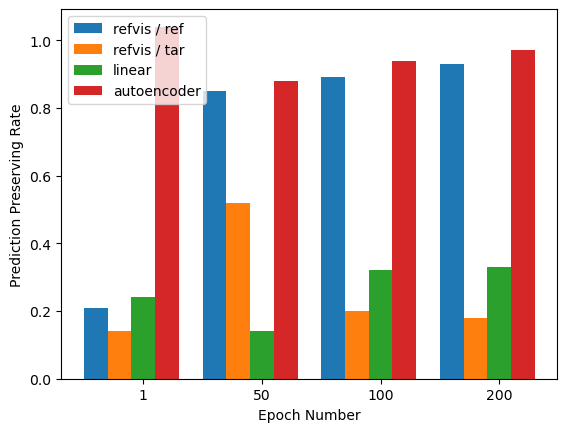

In [108]:
import numpy as np
import matplotlib.pyplot as plt

size = 4
name_list = ["1","50","100","200"]
x = np.arange(size)
#### timevis
a = [0.21,0.85,0.89,0.93]
#### tar in ref
d = [0.14,0.52,0.20,0.18]
#### linear
b = [0.24,0.14,0.32,0.33]
##### autoencoder
c = [1.04,0.88,0.94,0.97]


total_width, n = 0.8, 4
width = total_width / n
x = x - (total_width - width) / 2
plt.xlabel('Epoch Number')
plt.ylabel('Prediction Preserving Rate')
plt.bar(x, a,  width=width, label='refvis / ref')
plt.bar(x + width, d,  width=width, label='refvis / tar')
plt.bar(x + 2 * width, b, width=width, label='linear',tick_label=name_list)
plt.bar(x + 3 * width, c, width=width, label='autoencoder')
plt.legend()
plt.show()

In [17]:
##### eval

import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

from singleVis.eval.evaluate import *
n_neighbors = 30

train_data = ref_train_data
embedding = projector.batch_project(REF_EPOCH, train_data)
val = evaluate_proj_nn_perseverance_knn(train_data, embedding, n_neighbors=n_neighbors, metric="euclidean")

print("#train# nn preserving: {:.2f}/{:d} in epoch {:d}".format(val, n_neighbors, epoch))


Sat Apr  8 00:50:00 2023 Building RP forest with 16 trees
Sat Apr  8 00:50:01 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Sat Apr  8 00:50:04 2023 Building RP forest with 16 trees
Sat Apr  8 00:50:04 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving: 1.81/30 in epoch 99


In [62]:
REF_EPOCH =1

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 8640.71it/s]


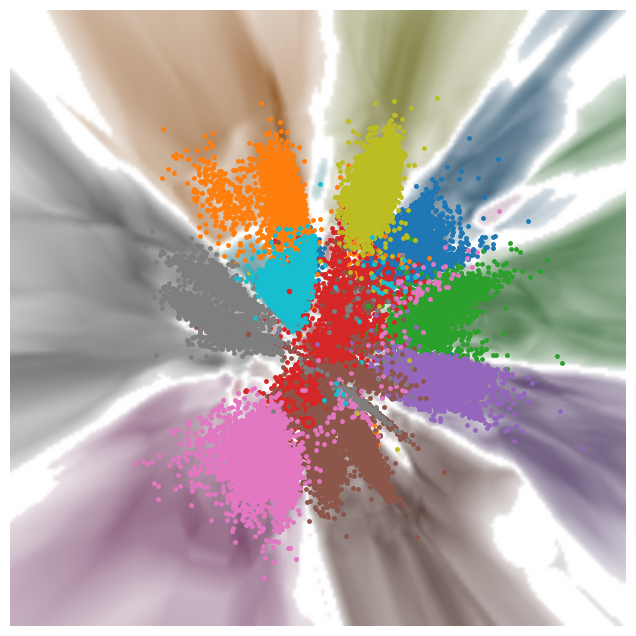

In [14]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'

projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
# from AlignVisAutoEncoder.trans_visualizer import visualizer
from representationTrans.trans_visualizer_border import visualizer
vis = visualizer(ref_provider, I,I, ref_provider.train_representation(REF_EPOCH), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 7351.15it/s]


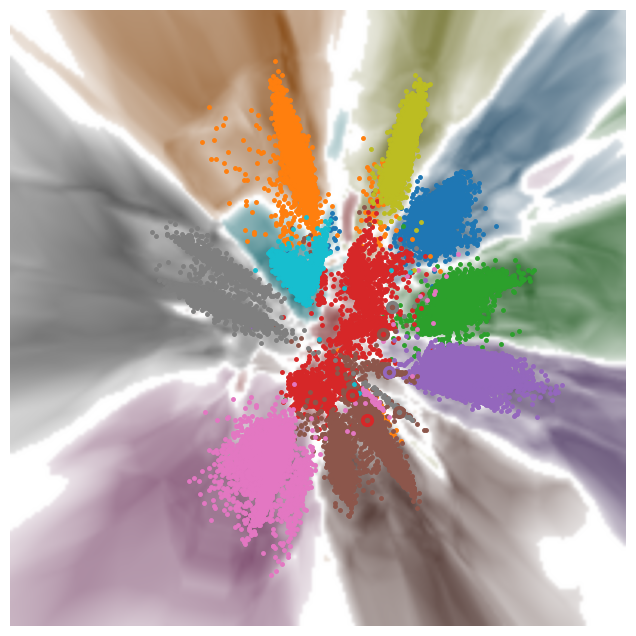

In [13]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVisAutoEncoder.trans_visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img2.png"))

In [7]:
checkpoint = torch.load("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVisAutoEncoder/checkpoints/dropout_no_f_epoch_200.pth")
autoencoder.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

<All keys matched successfully>

In [26]:
encoded_B_Y = autoencoder.encoder(torch.Tensor(tar_features))

In [27]:
##### boundary knn eval

import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)


projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

from singleVis.eval.evaluate import *
n_neighbors = 15

train_data = encoded_B_Y.detach().numpy()
embedding = projector.batch_project(REF_EPOCH, train_data)
########## reference_projector(autoencoder(target)) 2D vs target high dimensional
encoded_val = evaluate_proj_nn_perseverance_knn(tar_features, embedding, n_neighbors=n_neighbors, metric="euclidean")

print("#train# nn preserving for autoencoder: {:.2f}/{:d} in epoch {:d}".format(encoded_val, n_neighbors, REF_EPOCH))


Sun Apr  9 12:01:56 2023 Building RP forest with 9 trees
Sun Apr  9 12:01:57 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Sun Apr  9 12:01:57 2023 Building RP forest with 9 trees
Sun Apr  9 12:01:57 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 3.93/15 in epoch 100


In [28]:
REF_EPOCH

100

In [31]:
##### eval reference timevis visualize tar_representation

init_data = tar_features

embedding = projector.batch_project(REF_EPOCH, init_data)
val = evaluate_proj_nn_perseverance_knn(init_data, embedding, n_neighbors=n_neighbors, metric="euclidean")

print("#train# nn preserving for tar in ref vis: {:.2f}/{:d} in epoch {:d}".format(val, n_neighbors, REF_EPOCH))


Sun Apr  9 12:02:43 2023 Building RP forest with 9 trees
Sun Apr  9 12:02:43 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Sun Apr  9 12:02:43 2023 Building RP forest with 9 trees
Sun Apr  9 12:02:43 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for tar in ref vis: 2.82/15 in epoch 100


In [32]:
##### eval reference timevis visualize tar_representation

init_data = ref_features

embedding = projector.batch_project(REF_EPOCH, init_data)
val = evaluate_proj_nn_perseverance_knn(init_data, embedding, n_neighbors=n_neighbors, metric="euclidean")

print("#train# nn preserving for ref in ref vis: {:.2f}/{:d} in epoch {:d}".format(val, n_neighbors, REF_EPOCH))


Sun Apr  9 12:03:08 2023 Building RP forest with 9 trees
Sun Apr  9 12:03:08 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Sun Apr  9 12:03:08 2023 Building RP forest with 9 trees
Sun Apr  9 12:03:08 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for ref in ref vis: 3.41/15 in epoch 100


In [37]:
REF_EPOCH = 200
TAR_EPOCH = 200
X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(REF_EPOCH))
from AlignVis.AlignMetrixGenerator import TrainingSnapshotAlignment
alignment_n = TrainingSnapshotAlignment(ref_provider, tar_provider,ref_EPOCH=REF_EPOCH,tar_EPOCH=TAR_EPOCH, projector=projector, visualizer=vis)
R_n_2 = alignment_n.align_embeddings_batch(Y,X,train_steps=1000,CKA_LAMBDA=100,CKA_LAMBAD_FOR_INIT=1e-3,N_LAMBDA=100)

batch_idx 0,iteration 0, loss1 65502392.0 loss2 {tensor(0.7834, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.8510, requires_grad=True)}
batch_idx 199,iteration 199, loss1 592.7222900390625 loss2 {tensor(0.5366, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4920, requires_grad=True)}
batch_idx 398,iteration 398, loss1 236.24374389648438 loss2 {tensor(0.3439, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4660, requires_grad=True)}
batch_idx 97,iteration 597, loss1 216.66461181640625 loss2 {tensor(0.3112, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4190, requires_grad=True)}
batch_idx 296,iteration 796, loss1 228.19483947753906 loss2 {tensor(0.3359, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.4140, requires_grad=True)}
batch_idx 495,iteration 995, loss1 205.9328155517578 loss2 {tensor(0.2813, grad_fn=<AddBackward0>)} neibour_loss {tensor(0.3770, requires_grad=True)}


In [38]:
##### eval reference timevis visualize tar_representation
init_data = np.dot(tar_features,R_n_2.detach().numpy())

embedding = projector.batch_project(REF_EPOCH, init_data)
val = evaluate_proj_nn_perseverance_knn(tar_features, embedding, n_neighbors=n_neighbors, metric="euclidean")

print("#train# nn preserving for tar in ref vis: {:.2f}/{:d} in epoch {:d}".format(val, n_neighbors, REF_EPOCH))


Sun Apr  9 12:05:23 2023 Building RP forest with 9 trees
Sun Apr  9 12:05:23 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Sun Apr  9 12:05:23 2023 Building RP forest with 9 trees
Sun Apr  9 12:05:24 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for tar in ref vis: 3.38/15 in epoch 200


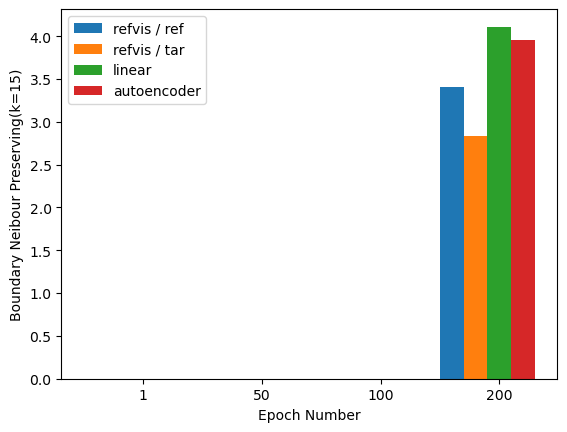

In [21]:
import numpy as np
import matplotlib.pyplot as plt

size = 4
name_list = ["1","50","100","200"]
x = np.arange(size)
#### timevis
a = [0,0,0,3.41]
#### tar in ref
d = [0,0,0,2.83]
#### linear
b = [0,0,0,4.11]
##### autoencoder
c = [0,0,0,3.96]


total_width, n = 0.8, 4
width = total_width / n
x = x - (total_width - width) / 2
plt.xlabel('Epoch Number')
plt.ylabel('Boundary Neibour Preserving(k=15)')
plt.bar(x, a,  width=width, label='refvis / ref')
plt.bar(x + width, d,  width=width, label='refvis / tar')
plt.bar(x + 2 * width, b, width=width, label='linear',tick_label=name_list)
plt.bar(x + 3 * width, c, width=width, label='autoencoder')
plt.legend()
plt.show()